In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carrega a imagem de exemplo
#Para trocar a imagem de input comente o input atual e 

img = cv2.imread("img/city.png",0)

#img = cv2.imread("img/baboon.png",0)
#img = cv2.imread("img/butterfly.png",0)
#img = cv2.imread("img/house.png",0)
#img = cv2.imread("img/seagull.png",0)

In [28]:
#filtros

h1 = np.array([[0,0,-1,0,0],
                  [0,-1,-2,-1,0],
                  [-1,-2,16,-2,-1],
                  [0,-1,-2,-1,0],
                  [0,0,-1,0,0]])

h2 = np.array([[1,4,6,4,1],
                   [4,16,24,16,4],
                   [6,24,36,24,6],
                   [4,16,24,16,4],
                   [1,4,6,4,1]])/256

h3 = np.array([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])

h4 = np.array([[-1,-2,-1],
               [0,0,0],
               [1,2,1]])

In [ ]:
#convoluções
dst1 = cv2.filter2D(img, -1, h1)
dst2 = cv2.filter2D(img, -1, h2)
dst3 = cv2.filter2D(img, -1, h3)
dst4 = cv2.filter2D(img, -1, h4)

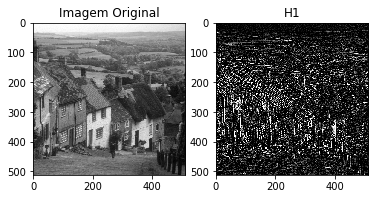

In [20]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst1,cmap="gray")
a.set_title('H1')

plt.show()

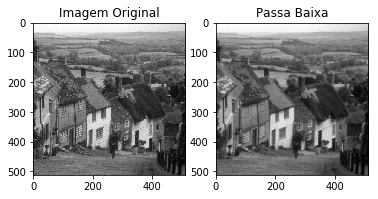

In [6]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst2,cmap="gray")
a.set_title('Passa Baixa')

plt.show()

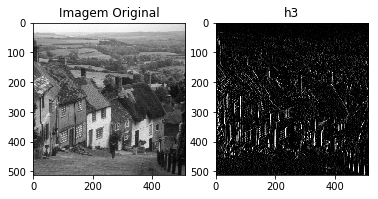

In [8]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst3,cmap="gray")
a.set_title('h3')

plt.show()

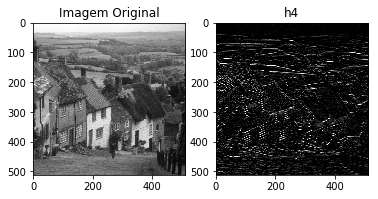

In [10]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst4,cmap="gray")
a.set_title('h4')

plt.show()

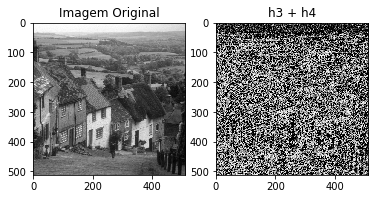

In [12]:
tmp1 = cv2.filter2D(img, -1, h3)
tmp2 = cv2.filter2D(img, -1, h4)

dst5 = (tmp1**2 + tmp2**2)**0.5

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst5,cmap="gray")
a.set_title('h3 + h4')

plt.show()

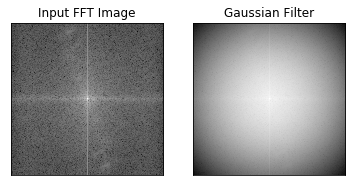

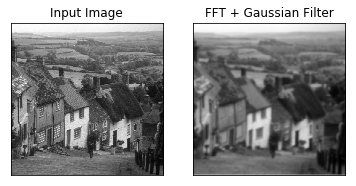

In [32]:
#converte para Fourier e desloca frequenxia-zero para centro
fshift = np.fft.fft2(img)
fshift = np.fft.fftshift(fshift)

#monta filtro gaussiano
gf  = cv2.getGaussianKernel(img.shape[0], 30)
gf = gf * gf.T


#aplica filtro
filtImg = fshift * gf

#Visualiação 
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum2 = 20*np.log(np.abs(filtImg))

#plt.subplot(121),plt.imshow(img, cmap = 'gray')
#plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Input FFT Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Gaussian Filter'), plt.xticks([]), plt.yticks([])
plt.show()

#recupera imagem
res = np.fft.ifftshift(filtImg)
res = np.fft.ifft2(res)
res = np.abs(res)

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(img,cmap="gray")

a = fig.add_subplot(1, 2, 2)
plt.title('FFT + Gaussian Filter'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(res,cmap="gray")
plt.show()


In [30]:
#Salva os resultados das filtragens
cv2.imwrite("results/h_1.png",dst1)
cv2.imwrite("results/h_2.png",dst2)
cv2.imwrite("results/h_3.png",dst3)
cv2.imwrite("results/h_4.png",dst4)
cv2.imwrite("results/h_3+h_4.png",dst5)
cv2.imwrite("results/fft.png",res)

#Salva as visualizações da FFT
cv2.imwrite("results/tmp/FFT.png",magnitude_spectrum)
cv2.imwrite("results/tmp/FFT_GF.png",magnitude_spectrum2)

True